 ***
<a id='lesson-4'></a>
# Lesson-4: Molecular Dynamics
***
- Molecular Dynamics is essentially the application of the Newtons Second Law to molecules, where the force acting on each part of the molecule is computed by modelling its interaction with every other part of the system.
- Total potential energy of the system: 
$$ U = \sum_{i\in\{bonds\}} \frac{1}{2} k_{b,i} (d_i - d_{0,i})^2 + \sum_{i\in\{angles\}} \frac{1}{2} k_{a,i} (\theta_i - \theta_{0,i})^2 + \\ \sum_{i\in\{dihedrals\}} \phi ( cos(n\theta_i)-1)  +  \sum_{i,j\in\{non-bond~pairs\}} \left( U_{LJ}(i,j) +  U_{Columbic}(i,j)\right)
$$
- Equations of motion given by:
$$ \frac{d\vec{p}_i}{dt} = \vec{F}_i \\ \frac{d \vec{r}_i}{dt} = \vec{p}_i/m_i $$
- Euler Method:
$$ \vec{p}_i(t+dt) = \vec{p}_i(t) + dt~\vec{F}_i(t) \\ \vec{r}_i(t+dt)=\vec{r}_i(t) + dt\vec{p}_i/m_i
$$
where the atom index $i \in [1,N]$
- Check on accuracy: constant total energy, total linear momentum
- Example: Simple harmonic oscillator



## Example: Argon
Argon atom is electrically neutral and a good model for the pair-wise interaction between two Argon atoms is given by Lennard-Jones potential, whose functional form is given by:
$$ U_{LJ} (\vec{r}_i,\vec{r}_j) = 4 \epsilon \left( \left(\frac{\sigma}{r} \right)^{12}- \left(\frac{\sigma}{r} \right)^6 \right)  $$
where $\vec{r} = \vec{r}_i - \vec{r}_j$ and $r=|\vec{r}|$. The force on particle $i$ due to its interaction via LJ potenital with particle $j$ is then given by: $$-\left( \frac{\partial U_{LJ}}{\partial x_i}, \frac{\partial U_{LJ}}{\partial y_i},\frac{\partial U_{LJ}}{\partial z_i} \right)$$
And the total potential of the system of $N$ Argon atoms is sum of all the pairwise interactions, i.e.,
$$ U = \frac{1}{2} \sum_{i,j=1, i\ne j}^N U_{LJ} (\vec{r}_i,\vec{r}_j) = \sum_{i<j} U_{LJ} (\vec{r}_i,\vec{r}_j)$$
Using the Euler method mentioned above, write a program to compute the trajectory of the system! 

Following functions might need to be written:

- `initialise_config`
- `initialise_momenta`
- `compute_force`, `compute_pairwiseLJ(i, j, sigma, epsilon)`
- `compute_totalEnergy`, `compute_energy_pairwiseLJ(i, j, sigma, epsilon)`
- `euler_integrate(timestep)`



In [67]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\renur\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [68]:
num=64
dim=2
temp=273
mass=40*1.6*10**(-27)
dt=10**(-20)
std_dev=((1.38*10**(-23))*273)**(1/2)

In [69]:
forces=np.zeros([num,dim])

In [70]:
def initialise_position(num,dim):
    pos=np.random.uniform(0,2,(num,dim))
    return pos
    
    

In [71]:
def initialise_momentum(num,dim,std_dev):
    mom=np.random.normal(0,std_dev,(num,dim))
    return mom

In [74]:
def force(pos):
    for idx,vec in enumerate(pos):
        r=np.linalg.norm(pos-vec,axis=1)
        r=np.delete(r,idx,axis=0)
        F=24*(2*(1/r)**11-(1/r)**5)*(1/r)**3
        r_vec=vec-pos
        r_vec=np.delete(r_vec,idx,axis=0)
        Final=F[:,None]*r_vec
        Final_force=np.sum(Final,axis=0)
        forces[idx]=Final_force
#         print(Final_force.shape)
    return
        

In [75]:
position=np.array(initialise_position(num,dim))
momentum=np.array(initialise_momentum(num,dim,std_dev))
Force=force(position)
#print(position)
#print(momentum)
print(Force)


None


In [76]:
def potential_energy(pos):
    pe=0
    for idx,vec in enumerate(pos):
        r=np.linalg.norm(pos-vec,axis=1)
        r=np.delete(r,idx,axis=0)
        U=4*((1/r)**12-(1/r)**6)
        energy=np.sum(U,axis=0)
        pe+=energy
    PE.append(pe)
    
    
    

In [77]:
def kinetic_energy(mom):
    p_2=np.linalg.norm(mom,axis=1)
    p_2=p_2**2
    p_2=p_2/mass
    energy=np.sum(p_2,axis=0)
    KE.append(energy)

In [78]:
def plot_particles(pos):
    plot(pos[:, 0], pos[:, 1],'.')
    plt.xlim([-30,30])
    plt.ylim([-30,30])
    xlabel('y')
    ylabel('x')
    title('x vs y')
    plt.show()

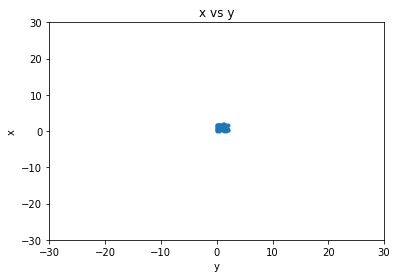

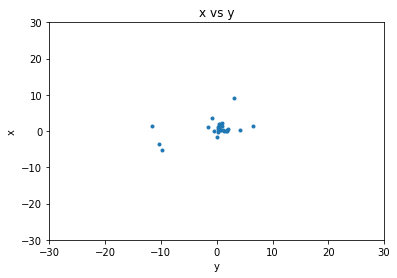

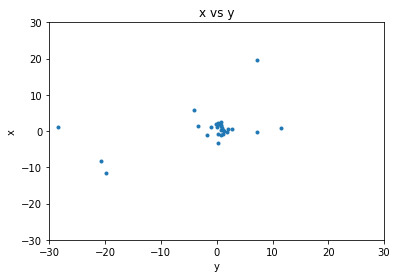

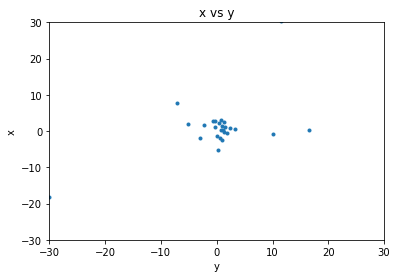

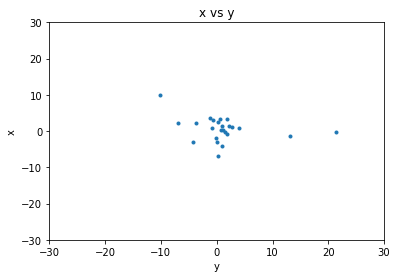

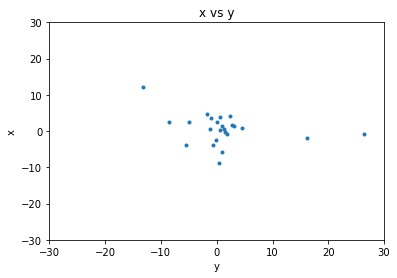

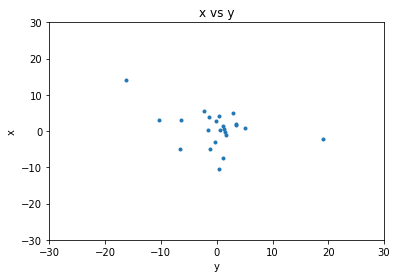

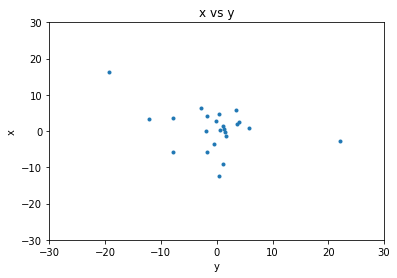

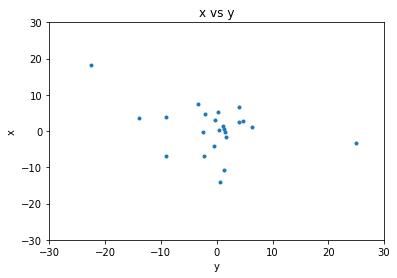

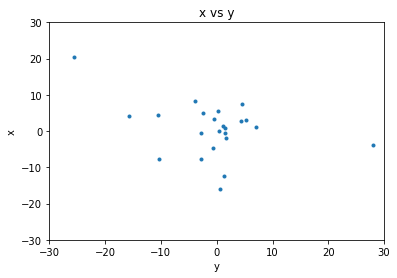

In [79]:
time=[]
t=0
PE=[]
KE=[]
for i in range(1000):
    position+=(momentum/mass)*dt
    potential_energy(position)
    kinetic_energy(momentum)
    momentum+=forces*dt
    force(position)
    if(i%100==0):
        plot_particles(position)
    t+=dt
    time.append(t)


In [80]:
#potential energy

In [81]:
# PE = PE[:10]
# time = time[:10]

In [82]:
PE = np.log(PE)

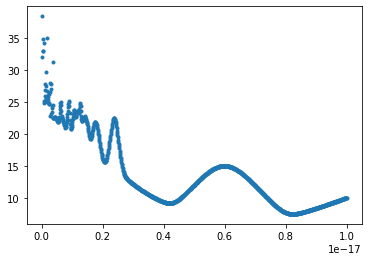

In [83]:
plot(time,PE, '.')
xlabel('PE')
ylabel('t')
title('PE vs t')

Text(0.5, 1.0, 'KE vs t')

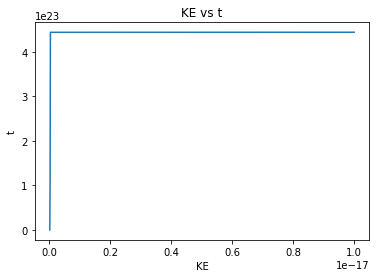

In [86]:
plot(time,(KE))
xlabel('KE')
ylabel('t')
title('KE vs t')

Text(0.5, 1.0, 'TE vs t')

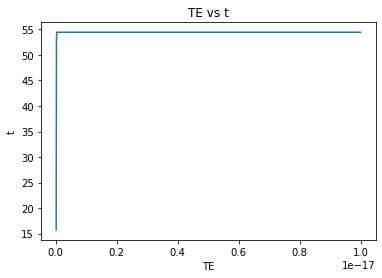

In [87]:
plot(time,log(KE+PE))
xlabel('TE')
ylabel('t')
title('TE vs t')